In [1]:
import pandas as pd
from math import sqrt

In [2]:
import csv
with open('../data/iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [3]:
import csv
import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                if((len(trainingSet)/len(dataset)) <= 0.67):
                    trainingSet.append(dataset[x])
                else:
                    testSet.append(dataset[x])
            else:
                if((len(testSet)/len(dataset)) <= 0.33):
                    testSet.append(dataset[x])
                else:
                    trainingSet.append(dataset[x])
                    


trainingSet=[]
testSet=[]
loadDataset('../data/iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)) )

Train: 100
Test: 50


In [4]:
def euclideanDistance(row1, row2, length):
    sum = 0
    for i in range(length):
        sum = sum + (row1[i] - row2[i])**2
    return sqrt(sum)


data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print ('Distance: ' + repr(distance))

Distance: 3.4641016151377544


In [5]:
import operator


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors


trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

[([4, 4, 4, 'b'], 1.4142135623730951)]


In [6]:
def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
#         response = neighbors[x][-1]
        response = neighbors[x][0][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(),
                         key=operator.itemgetter(1),
                         reverse=True)

    return sortedVotes[0][0]


In [7]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(predictions) - 1):
        if (predictions[i] == testSet[i][-1]):
            correct += 1
    return round((correct / float(len(testSet))) * 100.0, 2)

testSet = [[1, 1, 1, 'a'], [2, 2, 2, 'a'], [3, 3, 3, 'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)



66.67


In [8]:
trainingSet=[]
testSet=[]
loadDataset('../data/iris.data.txt', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)) )

Train: 100
Test: 50


In [9]:
results = []
for k in range(1,101):
    response = []
    for row in testSet:
        neighbors = getNeighbors(trainingSet, row, k)
        response.append(getResponse(neighbors))
    results.append(getAccuracy(testSet,response))

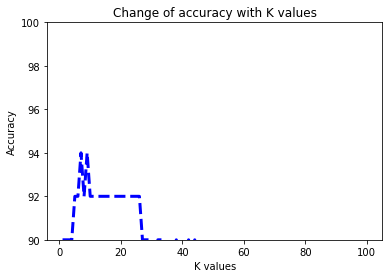

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = range(1,101)

# Make the plot
plt.plot(x, results, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel("K values")
plt.ylabel(r"Accuracy")
plt.title(r"Change of accuracy with K values")
plt.ylim(90, 100)
plt.show()


In [13]:
for i in range(len(results)):
    if(results[i] >= 90):
        print(i)
        print(results[i])
print(max(results))


0
90.0
1
90.0
2
90.0
3
90.0
4
92.0
5
92.0
6
94.0
7
92.0
8
94.0
9
92.0
10
92.0
11
92.0
12
92.0
13
92.0
14
92.0
15
92.0
16
92.0
17
92.0
18
92.0
19
92.0
20
92.0
21
92.0
22
92.0
23
92.0
24
92.0
25
92.0
26
90.0
27
90.0
28
90.0
31
90.0
32
90.0
33
90.0
37
90.0
41
90.0
43
90.0
94.0


We choose k==8 to have best accuracy ==94